<a href="https://colab.research.google.com/github/Saleem-144/MachineLearning-Project/blob/main/Fraud_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# DATA PREPROCESSING

import pandas as pd
pd.set_option('display.max_rows', 600)

In [99]:
cust = pd.read_csv("https://raw.githubusercontent.com/Saleem-144/MachineLearning-Project/main/cust.csv")
trans = pd.read_csv("https://raw.githubusercontent.com/Saleem-144/MachineLearning-Project/main/trans.csv")

In [100]:
cust.head()


,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [101]:
trans.head()


,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [102]:
cust.info(),trans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            -----

(None, None)

In [103]:
cust.isnull().sum()

Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64

In [104]:
trans.isnull().sum()

Unnamed: 0                          0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

In [105]:
merged_df = pd.merge(cust, trans, on='customerEmail', how='inner')

In [106]:
merged_df.head()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [107]:
merged_df = merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [108]:
merged_df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [109]:
#EDA

In [110]:
print("Summary statistics of numerical columns:\n")
print(merged_df.describe())

Summary statistics of numerical columns:

       No_Transactions   No_Orders  No_Payments  \
count       819.000000  819.000000   819.000000   
mean          5.195360    3.808303     2.135531   
std           2.924214    1.866872     1.860001   
min           0.000000    0.000000     0.000000   
25%           3.000000    3.000000     1.000000   
50%           5.000000    4.000000     2.000000   
75%           7.000000    5.000000     3.000000   
max          15.000000    8.000000    15.000000   

       paymentMethodRegistrationFailure  transactionAmount  transactionFailed  
count                        819.000000         819.000000         819.000000  
mean                           0.100122          35.147741           0.256410  
std                            0.300346          19.640072           0.436918  
min                            0.000000          10.000000           0.000000  
25%                            0.000000          22.000000           0.000000  
50%               

In [111]:
#DATA Visualization

In [112]:
import matplotlib.pyplot as plt

In [113]:
import seaborn as sns


In [114]:
numerical_features = ['No_Transactions', 'No_Orders', 'No_Payments',]

<Figure size 1500x1000 with 0 Axes>

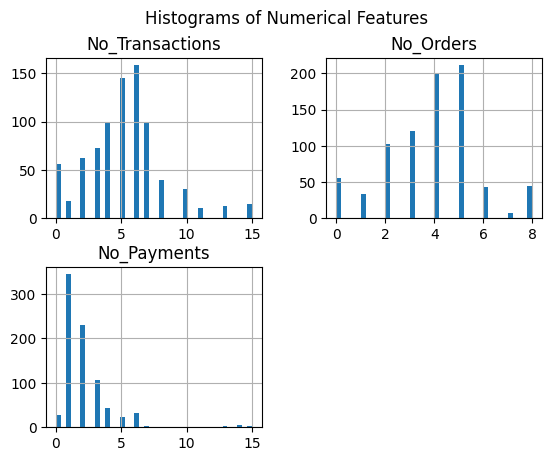

In [115]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(left=None, bottom=0.5, right=None, top=0.95)
merged_df[numerical_features].hist(bins=40)
plt.suptitle('Histograms of Numerical Features')
plt.show()



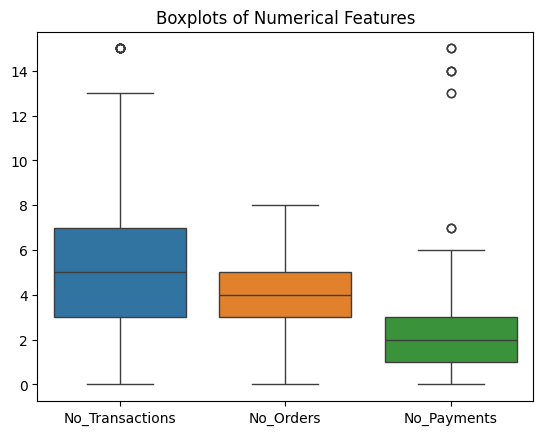

In [116]:
sns.boxplot(data=merged_df[numerical_features])
plt.title('Boxplots of Numerical Features')
plt.show()

In [117]:
merged_df.describe()


,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,5.195360,3.808303,2.135531,0.100122,35.147741,0.256410
std,2.924214,1.866872,1.860001,0.300346,19.640072,0.436918
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,3.000000,3.000000,1.000000,0.000000,22.000000,0.000000
50%,5.000000,4.000000,2.000000,0.000000,34.000000,0.000000
75%,7.000000,5.000000,3.000000,0.000000,46.000000,1.000000
max,15.000000,8.000000,15.000000,1.000000,353.000000,1.000000


In [118]:
Q1 = merged_df[numerical_features].quantile(0.25)
Q3 = merged_df[numerical_features].quantile(0.75)

In [119]:
Q1

No_Transactions    3.0
No_Orders          3.0
No_Payments        1.0
Name: 0.25, dtype: float64

In [120]:
Q3

No_Transactions    7.0
No_Orders          5.0
No_Payments        3.0
Name: 0.75, dtype: float64

In [121]:
IQR = Q3 - Q1

In [122]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [123]:
print("lower bound :\n",lower_bound)
print("upper bound :\n",upper_bound)

lower bound :
 No_Transactions   -3.0
No_Orders          0.0
No_Payments       -2.0
dtype: float64
upper bound :
 No_Transactions    13.0
No_Orders           8.0
No_Payments         6.0
dtype: float64


In [124]:
(merged_df[numerical_features] < lower_bound)

,No_Transactions,No_Orders,No_Payments
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
814,False,False,False
815,False,False,False
816,False,False,False
817,False,False,False


In [125]:
(merged_df[numerical_features] > upper_bound)

,No_Transactions,No_Orders,No_Payments
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
814,False,False,False
815,False,False,False
816,False,False,False
817,False,False,False


In [126]:
outliers = (merged_df[numerical_features] < lower_bound) | (merged_df[numerical_features] > upper_bound)

In [127]:
merged_df_cleaned = merged_df[~outliers.any(axis=1)]
merged_df_cleaned.shape

(792, 18)

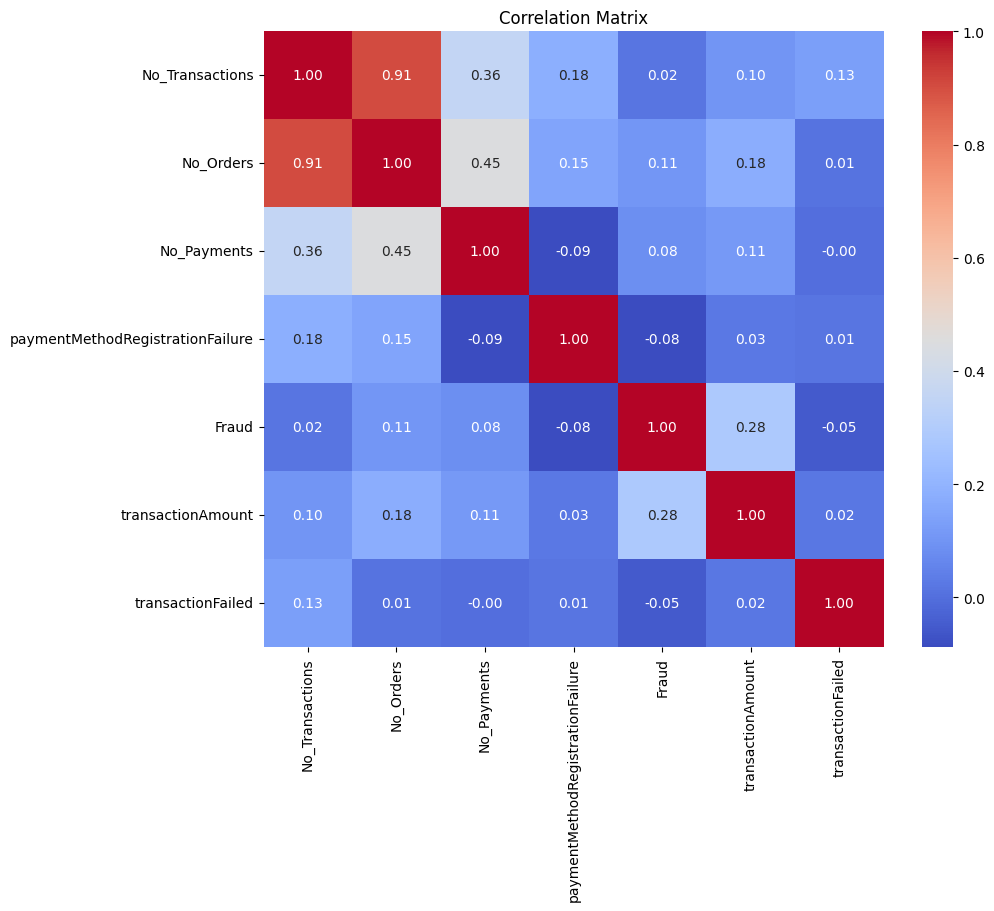

In [128]:
correlation_matrix = merged_df_cleaned[["No_Transactions","No_Orders","No_Payments",
                                        "paymentMethodRegistrationFailure",
                                        "Fraud","transactionAmount","transactionFailed"]].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [129]:
target_columns = correlation_matrix['No_Transactions']
print(target_columns)

No_Transactions                     1.000000
No_Orders                           0.905965
No_Payments                         0.356524
paymentMethodRegistrationFailure    0.182322
Fraud                               0.017571
transactionAmount                   0.101981
transactionFailed                   0.132469
Name: No_Transactions, dtype: float64


In [130]:
print(correlation_matrix['No_Payments'])

No_Transactions                     0.356524
No_Orders                           0.447551
No_Payments                         1.000000
paymentMethodRegistrationFailure   -0.088426
Fraud                               0.083014
transactionAmount                   0.111645
transactionFailed                  -0.001078
Name: No_Payments, dtype: float64


In [131]:
print(correlation_matrix['Fraud'])

No_Transactions                     0.017571
No_Orders                           0.105552
No_Payments                         0.083014
paymentMethodRegistrationFailure   -0.084723
Fraud                               1.000000
transactionAmount                   0.283296
transactionFailed                  -0.053811
Name: Fraud, dtype: float64


In [132]:
#Feature Engineering

In [133]:
#Transaction Success Rate
merged_df_cleaned = merged_df_cleaned.assign(
    Transaction_Success_Rate=((merged_df_cleaned['No_Transactions'] / (merged_df_cleaned['No_Transactions'] + merged_df_cleaned['transactionFailed'])) * 100).round(2)
)


In [134]:
print(merged_df_cleaned['Transaction_Success_Rate'])

0      100.00
1      100.00
5      100.00
6       83.33
7      100.00
        ...  
814     87.50
815    100.00
816     87.50
817    100.00
818    100.00
Name: Transaction_Success_Rate, Length: 792, dtype: float64


In [135]:
#Total Transaction

In [136]:
merged_df_cleaned.loc[:,'Transaction_TotalAmount'] = merged_df_cleaned['No_Transactions'] * merged_df_cleaned['transactionAmount']

In [137]:
print(merged_df_cleaned['Transaction_TotalAmount'])

0       36
1       52
5      165
6      120
7      120
      ... 
814    175
815    175
816    175
817    133
818    189
Name: Transaction_TotalAmount, Length: 792, dtype: int64


In [138]:
print(merged_df_cleaned)

                 customerEmail       customerPhone        customerDevice  \
0       josephhoward@yahoo.com        400-108-5415  yyeiaxpltf82440jnb3v   
1       josephhoward@yahoo.com        400-108-5415  yyeiaxpltf82440jnb3v   
5    andersonwilliam@yahoo.com        024.420.0375  4m7h5ipl1shyavt6vv2r   
6    andersonwilliam@yahoo.com        024.420.0375  4m7h5ipl1shyavt6vv2r   
7    andersonwilliam@yahoo.com        024.420.0375  4m7h5ipl1shyavt6vv2r   
..                         ...                 ...                   ...   
814    dawn05@tucker-brown.com  (089)703-7360x8848  lu4fgcug8dr0dwbcuui1   
815    dawn05@tucker-brown.com  (089)703-7360x8848  lu4fgcug8dr0dwbcuui1   
816    dawn05@tucker-brown.com  (089)703-7360x8848  lu4fgcug8dr0dwbcuui1   
817    dawn05@tucker-brown.com  (089)703-7360x8848  lu4fgcug8dr0dwbcuui1   
818    dawn05@tucker-brown.com  (089)703-7360x8848  lu4fgcug8dr0dwbcuui1   

                           customerIPAddress  \
0                               8.129.1

In [139]:
merged_df_cleaned.isna().sum()



customerEmail                        0
customerPhone                        0
customerDevice                       0
customerIPAddress                    0
customerBillingAddress               0
No_Transactions                      0
No_Orders                            0
No_Payments                          0
Fraud                                0
transactionId                        0
orderId                              0
paymentMethodId                      0
paymentMethodRegistrationFailure     0
paymentMethodType                    0
paymentMethodProvider                0
transactionAmount                    0
transactionFailed                    0
orderState                           0
Transaction_Success_Rate            44
Transaction_TotalAmount              0
dtype: int64

In [140]:
data = merged_df_cleaned.fillna(0)
data.isna().sum()

customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
Transaction_Success_Rate            0
Transaction_TotalAmount             0
dtype: int64

In [141]:
data.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState', 'Transaction_Success_Rate', 'Transaction_TotalAmount'],
      dtype='object')

In [142]:

X = data.drop(columns=['Fraud'])
y = data['Fraud']


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (792, 19)
Shape of y: (792,)


In [143]:
#Model Training with Package

In [144]:
# SVM with package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming `data` is already defined and contains the dataset with a 'Fraud' column

# Encode the categorical variables
X_encoded = pd.get_dummies(data.drop(columns=['Fraud']), drop_first=True)
y = data['Fraud']

# Split the dataset
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM)
svm_model_encoded = SVC(random_state=42, probability=True)
svm_model_encoded.fit(X_train_encoded, y_train_encoded)
svm_predictions_encoded = svm_model_encoded.predict(X_test_encoded)

# Evaluate SVM performance
svm_accuracy_encoded = accuracy_score(y_test_encoded, svm_predictions_encoded)
svm_precision_encoded = precision_score(y_test_encoded, svm_predictions_encoded)
svm_recall_encoded = recall_score(y_test_encoded, svm_predictions_encoded)
svm_f1_encoded = f1_score(y_test_encoded, svm_predictions_encoded)
svm_roc_auc_encoded = roc_auc_score(y_test_encoded, svm_model_encoded.predict_proba(X_test_encoded)[:, 1])
svm_confusion_matrix_encoded = confusion_matrix(y_test_encoded, svm_predictions_encoded)

print("SVM Metrics (with encoded data):")
print(f"Accuracy: {svm_accuracy_encoded}")
print(f"Precision: {svm_precision_encoded}")
print(f"Recall: {svm_recall_encoded}")
print(f"F1 Score: {svm_f1_encoded}")

print(f"Confusion Matrix:\n{svm_confusion_matrix_encoded}")


SVM Metrics (with encoded data):
Accuracy: 0.6226415094339622
Precision: 0.8409090909090909
Recall: 0.4111111111111111
F1 Score: 0.5522388059701492
ROC AUC: 0.6723027375201288
Confusion Matrix:
[[62  7]
 [53 37]]


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

X_encoded = pd.get_dummies(data.drop(columns=['Fraud']), drop_first=True)
y = data['Fraud']

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_model_encoded = RandomForestClassifier(random_state=42)
rf_model_encoded.fit(X_train_encoded, y_train_encoded)

rf_predictions_encoded = rf_model_encoded.predict(X_test_encoded)

rf_accuracy_encoded = accuracy_score(y_test_encoded, rf_predictions_encoded)
rf_precision_encoded = precision_score(y_test_encoded, rf_predictions_encoded)
rf_recall_encoded = recall_score(y_test_encoded, rf_predictions_encoded)
rf_f1_encoded = f1_score(y_test_encoded, rf_predictions_encoded)
rf_roc_auc_encoded = roc_auc_score(y_test_encoded, rf_model_encoded.predict_proba(X_test_encoded)[:, 1])
rf_confusion_matrix_encoded = confusion_matrix(y_test_encoded, rf_predictions_encoded)

print("RandomForest Metrics (with encoded data):")
print(f"Accuracy: {rf_accuracy_encoded}")
print(f"Precision: {rf_precision_encoded}")
print(f"Recall: {rf_recall_encoded}")
print(f"F1 Score: {rf_f1_encoded}")

print(f"Confusion Matrix:\n{rf_confusion_matrix_encoded}")


RandomForest Metrics (with encoded data):
Accuracy: 0.9937106918238994
Precision: 1.0
Recall: 0.9888888888888889
F1 Score: 0.9944134078212291
ROC AUC: 0.9990338164251208
Confusion Matrix:
[[69  0]
 [ 1 89]]


In [146]:
metrics_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "Random Forest": [rf_accuracy_encoded, rf_precision_encoded, rf_recall_encoded, rf_f1_encoded, rf_roc_auc_encoded],
    "SVM": [svm_accuracy_encoded, svm_precision_encoded, svm_recall_encoded, svm_f1_encoded, svm_roc_auc_encoded]
})

print(metrics_comparison)






      Metric  Random Forest       SVM
0   Accuracy       0.993711  0.622642
1  Precision       1.000000  0.840909
2     Recall       0.988889  0.411111
3   F1 Score       0.994413  0.552239
4    ROC AUC       0.999034  0.672303


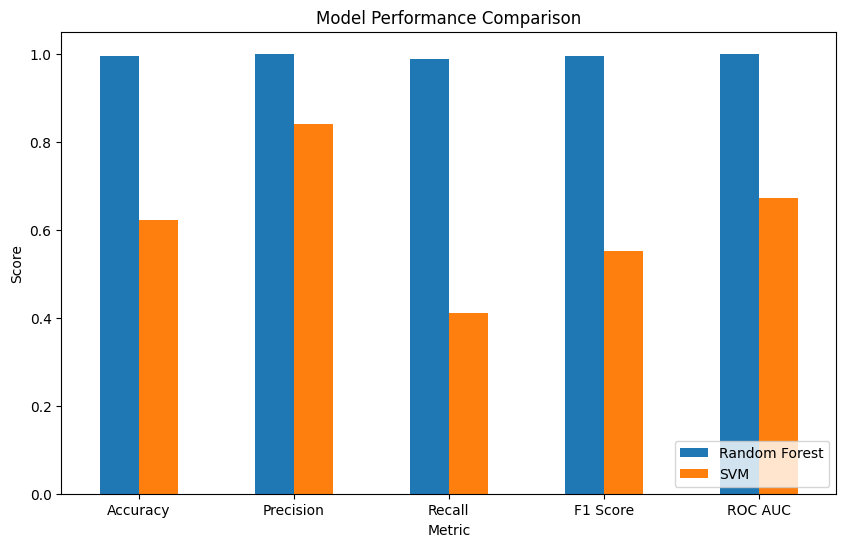

In [147]:
# Plot comparison
metrics_comparison.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [148]:
#WITHOUT PACKAGE MODEL

In [149]:
#SVM WITHOUT PACKAGE
import numpy as np
import pandas as pd

# Helper functions for one-hot encoding and manual train-test split
def get_dummies(df):
    return pd.get_dummies(df, drop_first=True)

def train_test_split_manual(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    return X[indices[test_size:]], X[indices[:test_size]], y[indices[test_size:]], y[indices[:test_size]]

# Simplified SVM classifier
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr, self.lambda_param, self.n_iters = lr, lambda_param, n_iters

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1).astype(np.float64)  # Ensure y_ is float64
        self.w, self.b = np.zeros(X.shape[1], dtype=np.float64), 0  # Ensure self.w is float64
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                x_i = x_i.astype(np.float64)  # Ensure x_i is float64
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * 2 * self.lambda_param * self.w
                else:
                    gradient = 2 * self.lambda_param * self.w - y_[idx] * x_i
                    self.w -= self.lr * gradient
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Metrics calculation functions
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tp / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tp / np.sum(y_true == 1) if np.sum(y_true == 1) > 0 else 0

def f1(y_true, y_pred):
    p, r = precision(y_true, y_pred), recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

# Assuming merged_df is already loaded with the data
# Use merged_df directly for further processing
X = get_dummies(merged_df.drop(columns=['Fraud'])).values
y = merged_df['Fraud'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split_manual(X, y)

# Train SVM model
svm = SVM()
svm.fit(X_train, y_train)

# Predict and evaluate performance
y_pred = svm.predict(X_test)
print("SVM  Metrics:")
print(f"Accuracy: {accuracy(y_test, y_pred):.2f}")
print(f"Precision: {precision(y_test, y_pred):.2f}")
print(f"Recall: {recall(y_test, y_pred):.2f}")
print(f"F1 Score: {f1(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


SVM  Metrics:
Accuracy: 0.56
Precision: 0.81
Recall: 1.00
F1 Score: 0.90
Confusion Matrix:
 [[ 0 21]
 [ 0 92]]


In [150]:
#RANDOM FOREST WITHOUT PACKAGE
import numpy as np
import pandas as pd

# TreeNode class for defining nodes in the decision tree
class TreeNode:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

# Decision Tree Classifier
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(n_samples_per_class)
        node = TreeNode(predicted_class=predicted_class)

        if self.max_depth is None or depth < self.max_depth:
            feature_index, threshold = self._find_best_split(X, y)
            if feature_index is not None:
                indices_left = X[:, feature_index] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = feature_index
                node.threshold = threshold
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)

        return node

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        if n_samples <= 1:
            return None, None

        # Calculate Gini impurity for the parent node
        sum_total = np.sum([np.sum((y == c) ** 2) for c in range(self.n_classes_)])
        p = 1 - sum_total / (n_samples ** 2)

        best_gini, best_idx, best_thr = float('inf'), None, None

        for idx in range(n_features):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            classes = np.array(classes)  # Convert classes to numpy array
            sums_left = np.cumsum(np.eye(n_samples, dtype=int)[classes], axis=0)
            sums_right = np.flipud(np.cumsum(np.eye(n_samples, dtype=int)[classes[::-1]], axis=0))
            gini = 1 - np.sum((sums_left ** 2 + sums_right ** 2), axis=1) / (n_samples ** 2)

            # Find the best split
            if thresholds and np.min(gini) < best_gini:
                best_gini = np.min(gini)
                best_idx = idx
                best_thr = thresholds[np.argmin(gini)]

        return best_idx, best_thr

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, tree):
        if tree.left is None and tree.right is None:
            return tree.predicted_class
        else:
            if x[tree.feature_index] < tree.threshold:
                return self._predict_tree(x, tree.left)
            else:
                return self._predict_tree(x, tree.right)

# Helper functions for evaluation metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tp / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tp / np.sum(y_true == 1) if np.sum(y_true == 1) > 0 else 0

def f1(y_true, y_pred):
    p, r = precision(y_true, y_pred), recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

# Main script for using DecisionTree classifier
if __name__ == "__main__":
    # Assuming merged_df already contains the data with 'Fraud' column
    X = merged_df.drop(columns=['Fraud']).values
    y = merged_df['Fraud'].values

    # Split data
    def train_test_split_manual(X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        test_size = int(len(X) * test_size)
        return X[indices[test_size:]], X[indices[:test_size]], y[indices[test_size:]], y[indices[:test_size]]

    X_train, X_test, y_train, y_test = train_test_split_manual(X, y)

    # Train Decision Tree model
    dt = DecisionTree(max_depth=5)  # Set max_depth as desired or leave as None for unlimited depth
    dt.fit(X_train, y_train)

    # Predict and evaluate performance
    y_pred = dt.predict(X_test)
    print("Random Forest  Metrics:")
    print(f"Accuracy: {accuracy(y_test, y_pred):.4f}")
    print(f"Precision: {precision(y_test, y_pred):.4f}")
    print(f"Recall: {recall(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")




Random Forest  Metrics:
Accuracy: 0.5644
Precision: 0.5644
Recall: 1.0000
F1 Score: 0.7216
Confusion Matrix:
[[ 0 71]
 [ 0 92]]
